## `Air Quality Prediction`

### Group Members
| Roll No.   | Name               |
|------------|--------------------|
| 251140005  | Chandan Yadav      |
| 251140007  | Devashish Pandey   |
| 251140018  | Rajdatta Kohale    |
| 251140019  | Rohit Kumar        |
| 251140027  | Vikram Anand       |


### `Importing libraries required for Phase 1 of the project`

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')
#%pip install statsmodels

### `Loading the Dataset`

In [91]:
file_path = 'AirQualityUCI.csv'
df = pd.read_csv(file_path, sep=',', na_values=-200)
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10-03-2004  18:00:00     2.6       1360.0     150.0      11.9   
1  10-03-2004  19:00:00     2.0       1292.0     112.0       9.4   
2  10-03-2004  20:00:00     2.2       1402.0      88.0       9.0   
3  10-03-2004  21:00:00     2.2       1376.0      80.0       9.2   
4  10-03-2004  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

### `Cleaning and Preprocessing`

In [92]:
df.dropna(how='all', inplace=True) # Drop rows that are completely empty

df['DateTime'] = df['Date'] + ' ' + df['Time']
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H:%M:%S', errors='coerce')

df.dropna(subset=['DateTime'], inplace=True) # Drop rows where conversion failed
df.set_index('DateTime', inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)

print(f"Data shape after datetime processing: {df.shape}")
print(df.info())
df.head()

Data shape after datetime processing: (9357, 13)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       914 non-null    float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7718 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7715 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB
None


CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
DateTime                                                                      
2004-03-10 18:00:00     2.6       1360.0     150.0      11.9         1046.0   
2004-03-10 19:00:00     2.0       1292.0     112.0       9.4          955.0   
2004-03-10 20:00:00     2.2       1402.0      88.0       9.0          939.0   
2004-03-10 21:00:00     2.2       1376.0      80.0       9.2          948.0   
2004-03-10 22:00:00     1.6       1272.0      51.0       6.5          836.0   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
DateTime                                                            
2004-03-10 18:00:00    166.0        1056.0    113.0        1692.0   
2004-03-10 19:00:00    103.0        1174.0     92.0        1559.0   
2004-03-10 20:00:00    131.0        1140.0    114.0        1555.0   
2004-03-10 21:00:00    172.0        1092.0    122.0        1584.0   
2004-03-10 22:00:00    131.0        1205.0    116.0        1490.0   

                     PT08.S5(O3)     T    RH      AH  
DateTime                                              
2004-03-10 18:00:00       1268.0  13.6  48.9  0.7578  
2004-03-10 19:00:00        972.0  13.3  47.7  0.7255  
2004-03-10 20:00:00       1074.0  11.9  54.0  0.7502  
2004-03-10 21:00:00       1203.0  11.0  60.0  0.7867  
2004-03-10 22:00:00       1110.0  11.2  59.6  0.7888

#### Identify Data Types

- Specify `na_values = -200` since missing values are represented by **-200**.  
- Parse the **Date** and **Time** columns and combine them into a single **DateTime index**.  
- Convert the combined column to the proper **datetime format**.  
- Use `.info()` to check all column names and their respective data types.  

**Findings:**  
- All data columns are correctly identified as **float64**.  
- The index is a **DatetimeIndex**, which is the appropriate format for time-series analysis.


In [93]:
    print("\n --- Descriptive Statistics ---")
    print(df.describe())


 --- Descriptive Statistics ---
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  7674.000000  8991.000000   914.000000  8991.000000    8991.000000   
mean      2.152750  1099.833166   218.811816    10.083105     939.153376   
std       1.453252   217.080037   204.459921     7.449820     266.831429   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.100000   937.000000    67.000000     4.400000     734.500000   
50%       1.800000  1063.000000   150.000000     8.200000     909.000000   
75%       2.900000  1231.000000   297.000000    14.000000    1116.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  7718.000000   8991.000000  7715.000000   8991.000000  8991.000000   
mean    246.896735    835.493605   113.091251   1456.264598  1022.906128   
std     212.979168    256.817320    48.370108    346.2

#### Present Descriptive Statistics

- Use the `.describe()` method to generate a **statistical summary** of all numerical columns.  
- This provides key measures such as **mean**, **standard deviation (std)**, **minimum**, **maximum**, and **quartiles (25%, 50%, 75%)** for each variable.  

**Findings:**  
- A large gap between the **75th percentile** and **maximum** for some variables for example:
  - **CO(GT): 2.9 → 11.9**,  
  - **NMHC(GT): 297 → 1189**,  
  indicates the **presence of outliers** in the dataset.


#### Checking and handling missing values

In [94]:
print("\n--- Missing Value Percentages (Before Handling) ---")
missing_perc = df.isnull().sum() / len(df) * 100
print(missing_perc)

df.drop(columns=['NMHC(GT)'], inplace=True)
print("\nDropped 'NMHC(GT)' column due to >90% missing values.")
df.interpolate(method='time', inplace=True)
df.fillna(method='bfill', inplace=True)
print("\nTotal remaining missing values after interpolation:", df.isnull().sum().sum())


--- Missing Value Percentages (Before Handling) ---
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

Dropped 'NMHC(GT)' column due to >90% missing values.

Total remaining missing values after interpolation: 0


#### Identify and Handle Missing Values

- Calculate the **percentage of missing values** for each column.  
- Remove columns with an **excessive proportion of missing data**.  
- For the remaining columns, fill gaps using **`interpolate(method='time')`**, which leverages time-based relationships to estimate missing values more accurately than mean or median imputation.  

**Findings:**  
- **NMHC(GT)** has **90.2% missing values** and is therefore **dropped**.  
- Other columns have **3.9%–18%** missing data, which are **successfully filled** using time-series interpolation.


#### Identifying and handling duplicates

In [95]:
duplicate_count = df.index.duplicated().sum()
print(f"Number of duplicate timestamps found: {duplicate_count}")
if duplicate_count > 0:
    df = df[~df.index.duplicated(keep='first')]                   # Removing duplicate indices, keeping the first occurrence
    print(f"New shape after removing duplicates: {df.shape}")
else:
    print("No duplicate timestamps to remove.")

df.info()

Number of duplicate timestamps found: 0
No duplicate timestamps to remove.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   C6H6(GT)       9357 non-null   float64
 3   PT08.S2(NMHC)  9357 non-null   float64
 4   NOx(GT)        9357 non-null   float64
 5   PT08.S3(NOx)   9357 non-null   float64
 6   NO2(GT)        9357 non-null   float64
 7   PT08.S4(NO2)   9357 non-null   float64
 8   PT08.S5(O3)    9357 non-null   float64
 9   T              9357 non-null   float64
 10  RH             9357 non-null   float64
 11  AH             9357 non-null   float64
dtypes: float64(12)
memory usage: 1.2 MB


#### Identify and Handle Duplicates

- Check for **duplicate timestamps** in the **Datetime index**, as duplicates can distort time-series analysis.  
- If any duplicates are found, **retain only the first entry** for each timestamp and remove the rest.  

**Findings:**  
- No **duplicate timestamps** were found.  
- **No rows were removed**, confirming the dataset’s **integrity and consistency**.

#### Identifying and handling outliers

Saved 'outlier_boxplots_before_1.png'


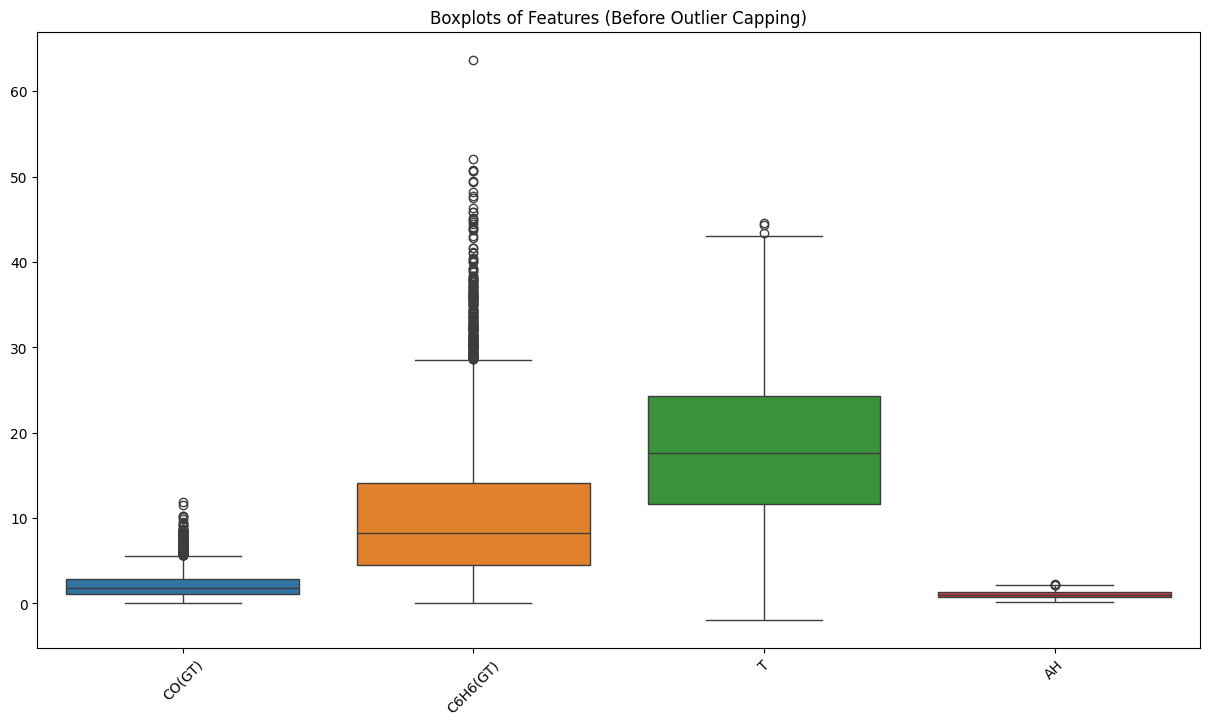

Saved 'outlier_boxplots_before_2.png'


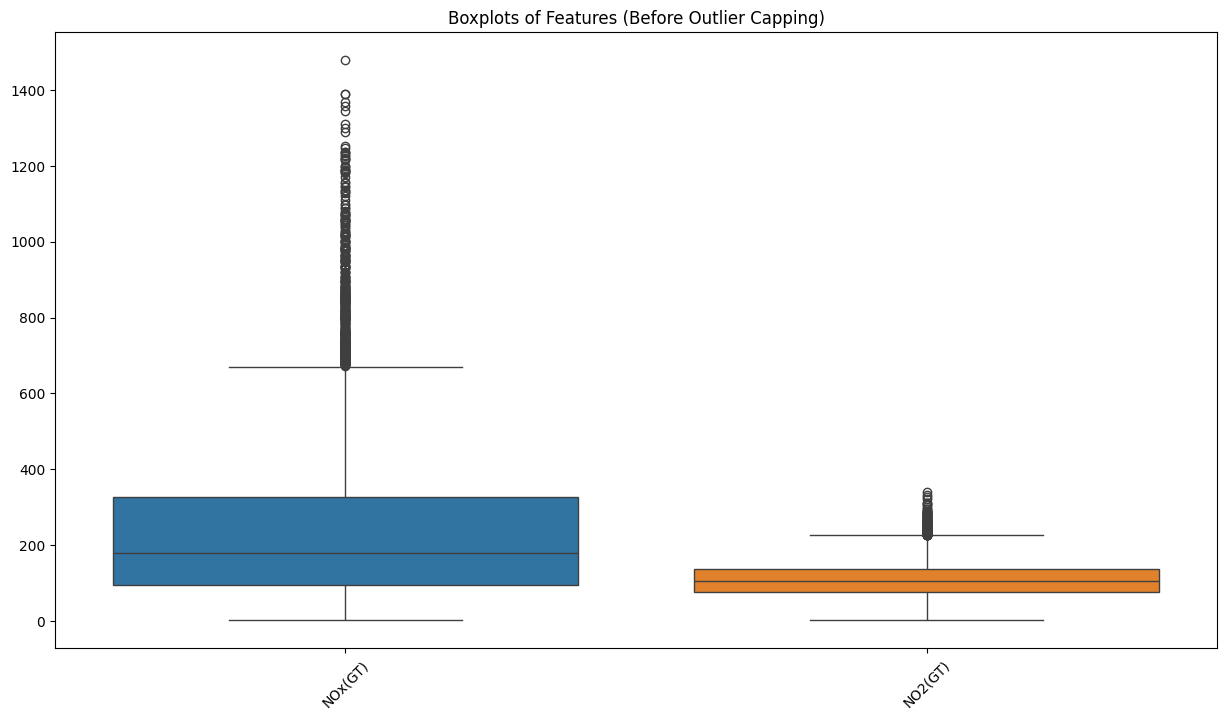

Saved 'outlier_boxplots_before_3.png'


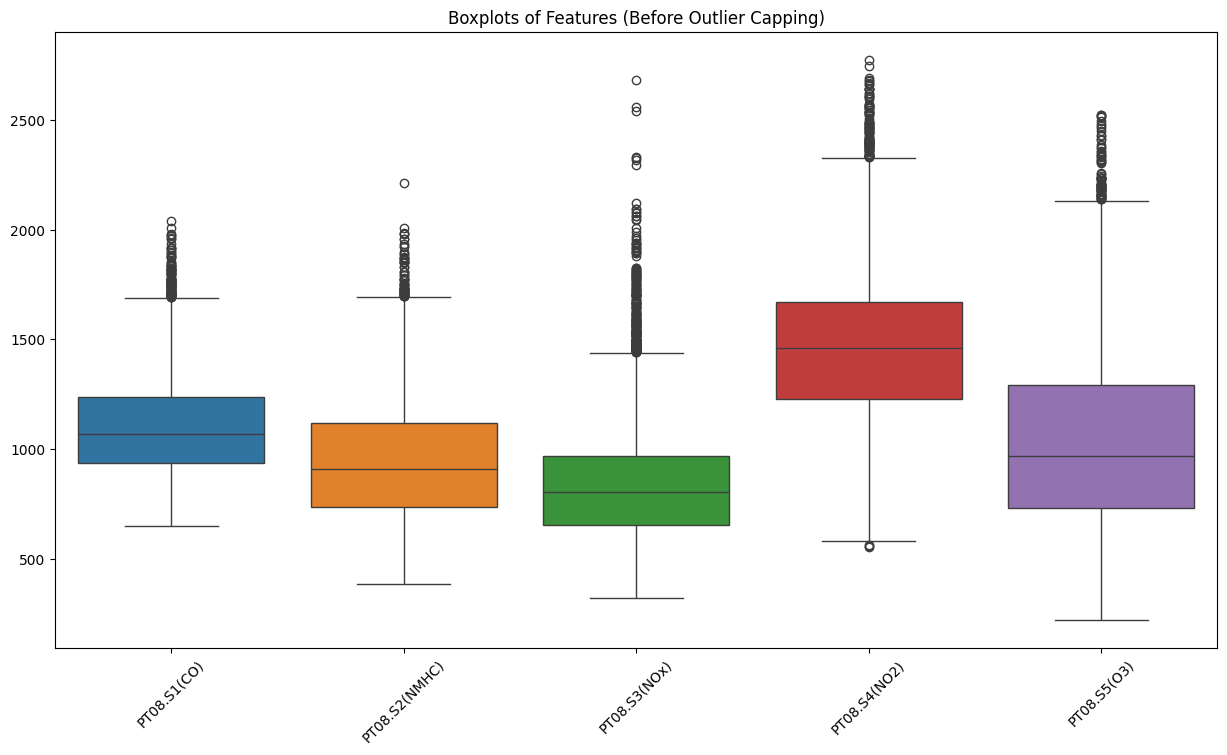


Outliers have been capped using the 1.5 * IQR rule.
Saved 'outlier_boxplots_after_1.png'


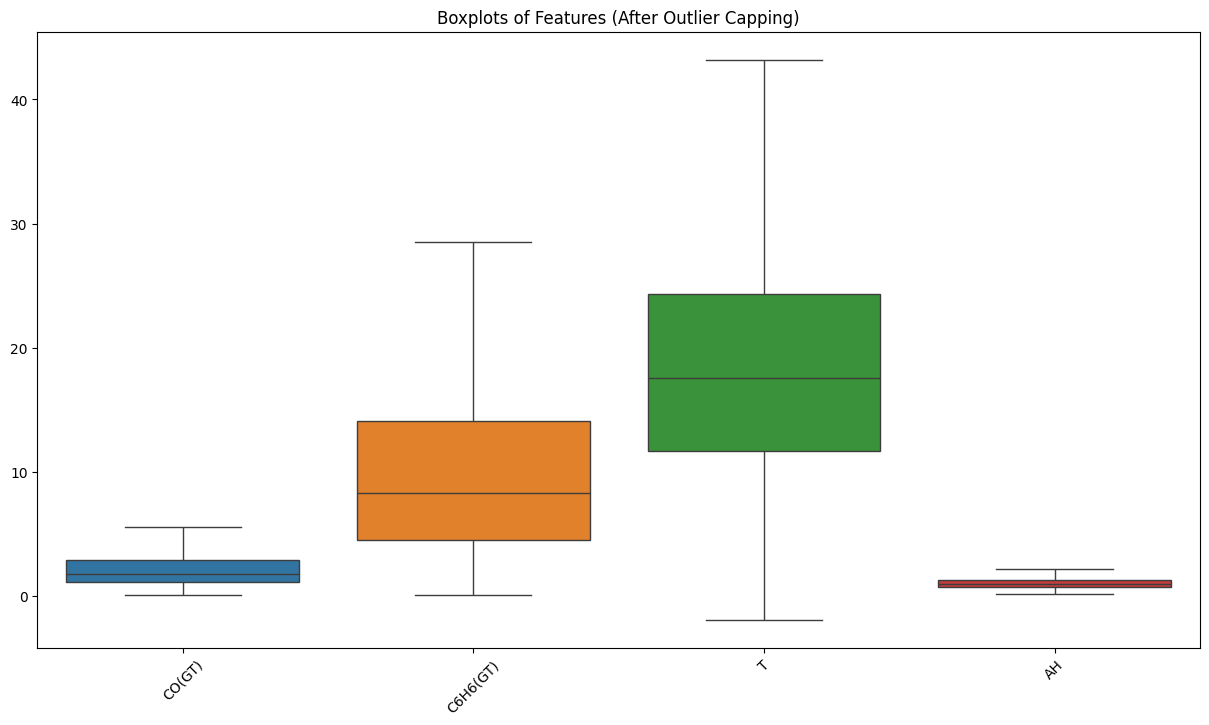

Saved 'outlier_boxplots_after_2.png'


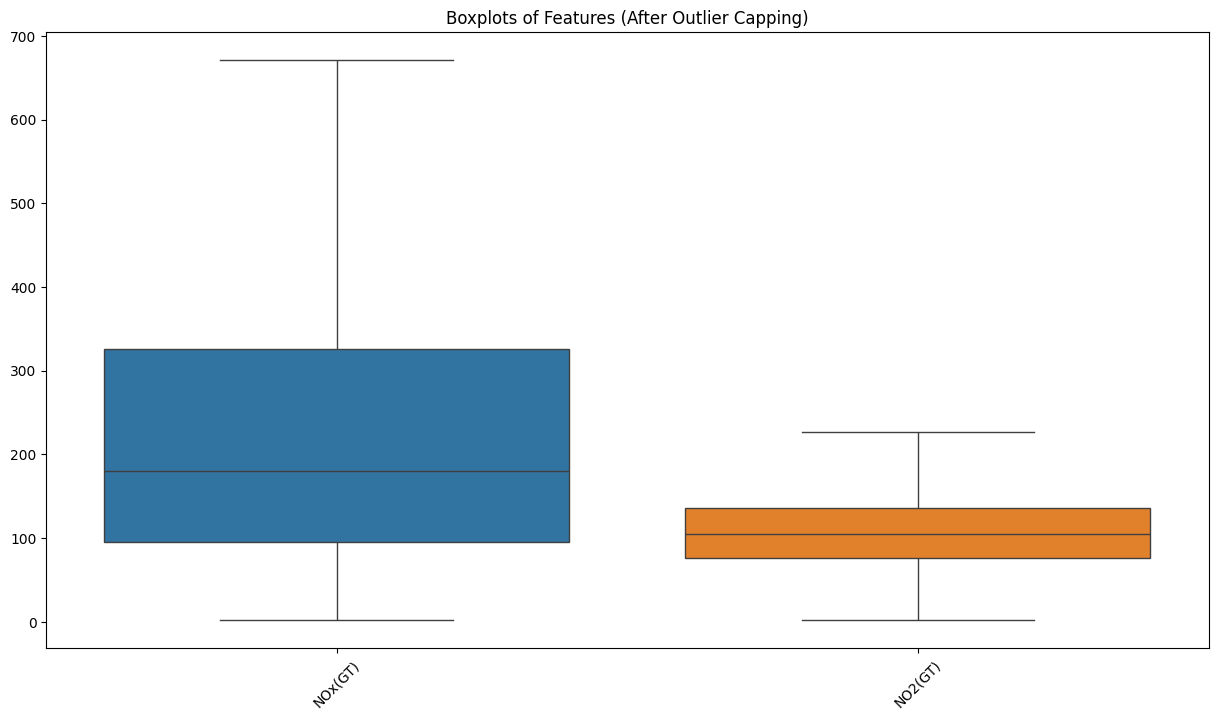

Saved 'outlier_boxplots_after_3.png'


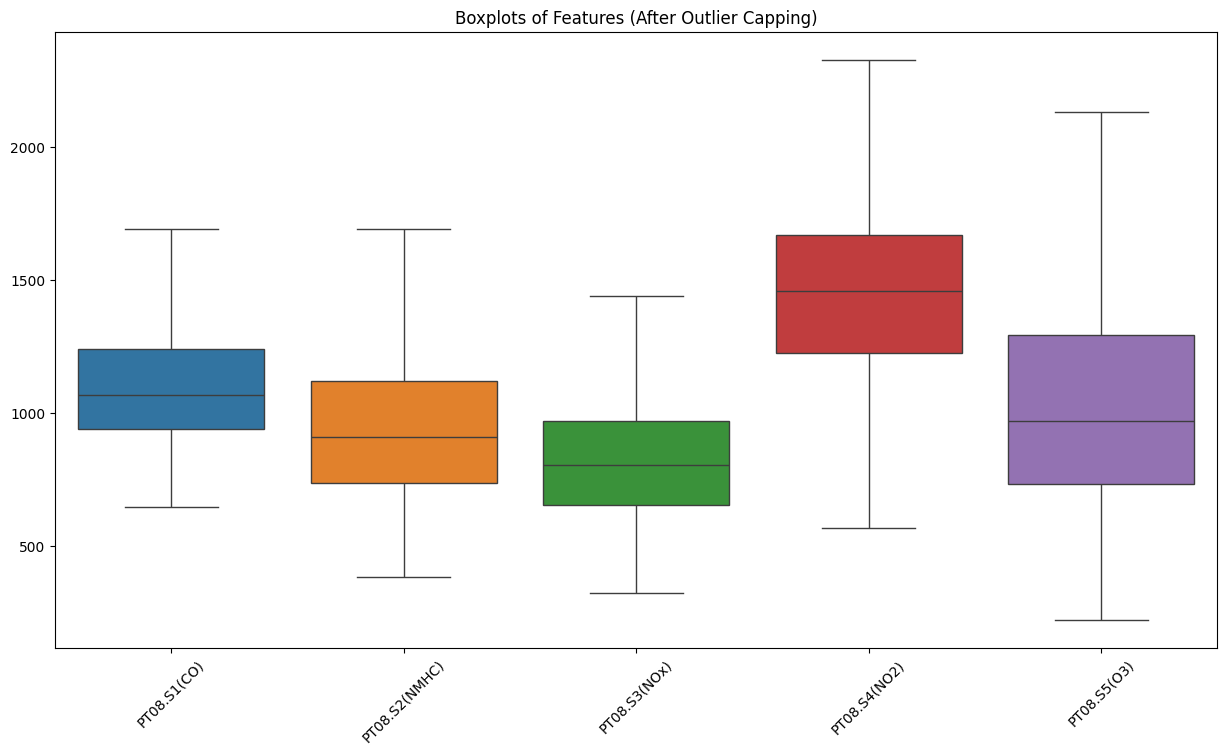


--- Descriptive Statistics (After Capping) ---
            CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   
mean      2.101379  1101.975687    10.026681     941.395372   233.396740   
std       1.334504   214.838099     7.001495     265.471134   177.668542   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.100000   938.000000     4.500000     736.000000    96.000000   
50%       1.800000  1067.000000     8.300000     910.012987   180.000000   
75%       2.900000  1239.000000    14.100000    1119.000000   326.000000   
max       5.600000  1690.500000    28.500000    1693.500000   671.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9357.000000  9357.000000   9357.000000  9357.000000  9357.000000   
mean     827.277439   109.189784   1451.674041  1031.490007    18.233120   
std      237.375464    45.097420    338

In [96]:
# Visualize Outliers (Before)
cols_to_plot1 = ['CO(GT)', 'C6H6(GT)', 'T', 'AH']

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[cols_to_plot1])
plt.title('Boxplots of Features (Before Outlier Capping)')
plt.xticks(rotation=45)
plt.savefig('outlier_boxplots_before_1.png')
print("Saved 'outlier_boxplots_before_1.png'")
plt.show()
plt.close()


cols_to_plot2 = ['NOx(GT)', 'NO2(GT)']

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[cols_to_plot2])
plt.title('Boxplots of Features (Before Outlier Capping)')
plt.xticks(rotation=45)
plt.savefig('outlier_boxplots_before_2.png')
print("Saved 'outlier_boxplots_before_2.png'")
plt.show()
plt.close()


cols_to_plot3 = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[cols_to_plot3])
plt.title('Boxplots of Features (Before Outlier Capping)')
plt.xticks(rotation=45)
plt.savefig('outlier_boxplots_before_3.png')
print("Saved 'outlier_boxplots_before_3.png'")
plt.show()
plt.close()

# Handling Outliers by Capping
df_capped = df.copy()

for col in df_capped.columns:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_capped[col] = np.clip(df_capped[col], lower_bound, upper_bound)  # Using np.clip to cap the values

print("\nOutliers have been capped using the 1.5 * IQR rule.")

# Visualize Outliers (After)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_capped[cols_to_plot1])
plt.title('Boxplots of Features (After Outlier Capping)')
plt.xticks(rotation=45)
plt.savefig('outlier_boxplots_after_1.png')
print("Saved 'outlier_boxplots_after_1.png'")
plt.show()
plt.close()

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_capped[cols_to_plot2])
plt.title('Boxplots of Features (After Outlier Capping)')
plt.xticks(rotation=45)
plt.savefig('outlier_boxplots_after_2.png')
print("Saved 'outlier_boxplots_after_2.png'")
plt.show()
plt.close()

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_capped[cols_to_plot3])
plt.title('Boxplots of Features (After Outlier Capping)')
plt.xticks(rotation=45)
plt.savefig('outlier_boxplots_after_3.png')
print("Saved 'outlier_boxplots_after_3.png'")
plt.show()
plt.close()

print("\n--- Descriptive Statistics (After Capping) ---")
print(df_capped.describe())

In [97]:
df_long_raw_before_capping = df.melt(var_name='Attribute', value_name='Raw Value Before Capping')

fig = px.box(df_long_raw_before_capping, x='Attribute', y='Raw Value Before Capping', points = "outliers", color = "Attribute",
             color_discrete_sequence = px.colors.qualitative.Set3,
             title = "Boxplot of Raw Features Before Outlier Capping (Outliers Only)")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

### Identify and Handle Outliers

- Visualize **feature distributions** using **boxplots** to detect outliers.  
- Apply **capping (Winsorization)** using the **1.5 × IQR rule**:  
  - Values above **Q3 + 1.5 × IQR** are set to the upper bound.  
  - Values below **Q1 - 1.5 × IQR** are set to the lower bound.

**Findings:**  
- Boxplots reveal several **high-end outliers**.  
- After capping, the distributions appear **much cleaner and more uniform**.  
- For instance, the **maximum CO(GT)** value decreases from **11.9 to 5.6**.


### `Exploratory Data Analysis (EDA)`

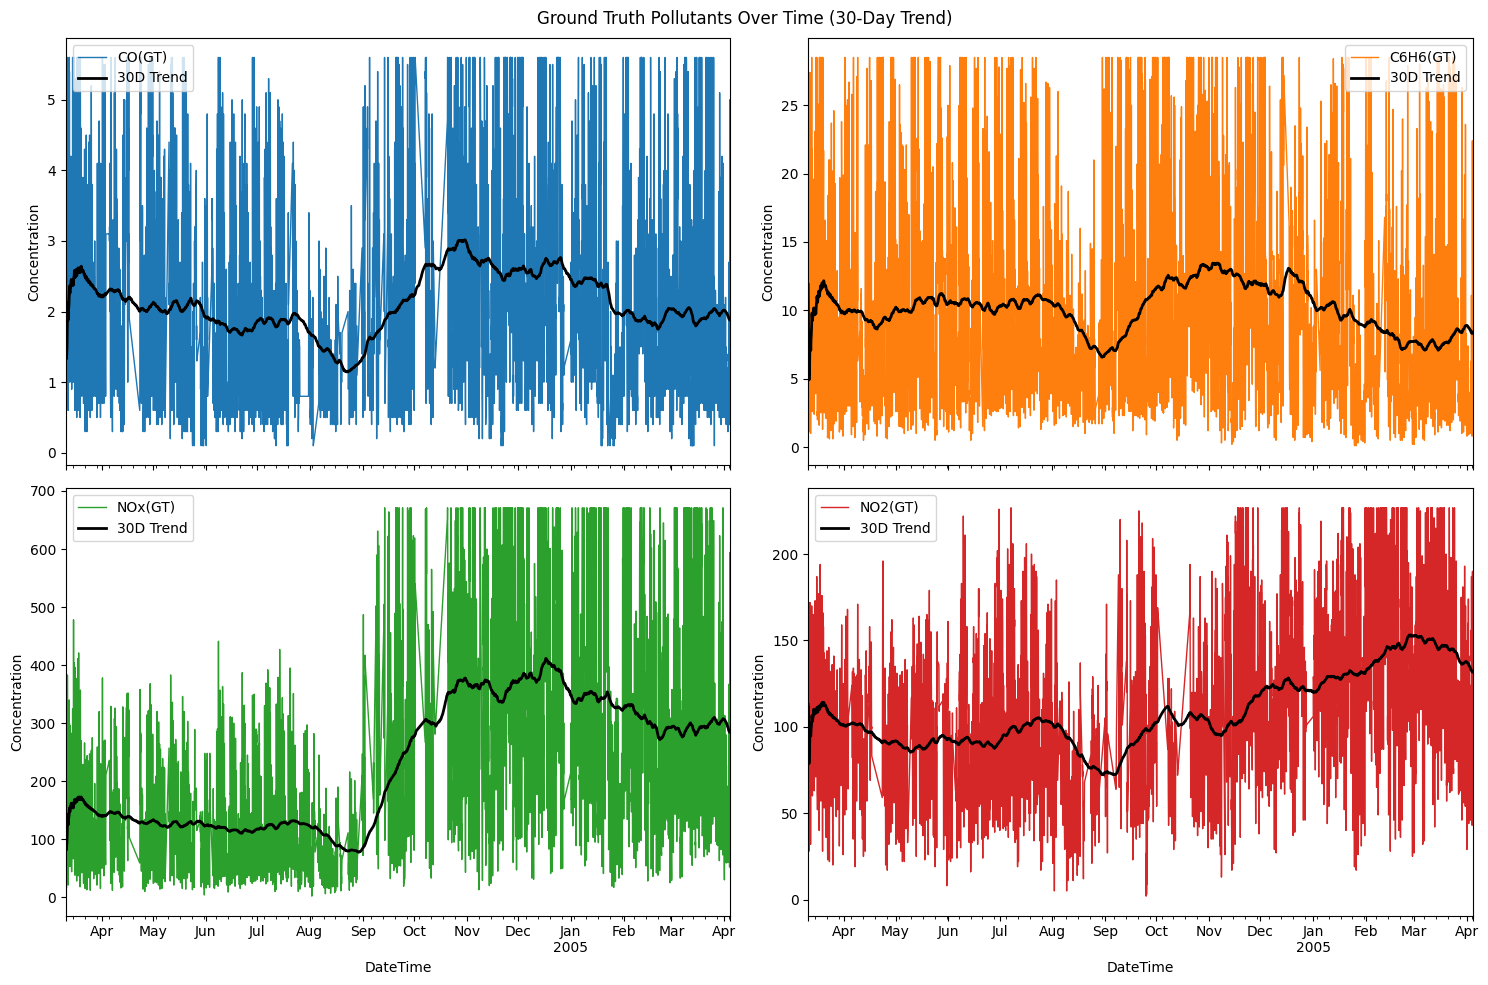

Saved 'pollutants_vs_time_with_trend.png'


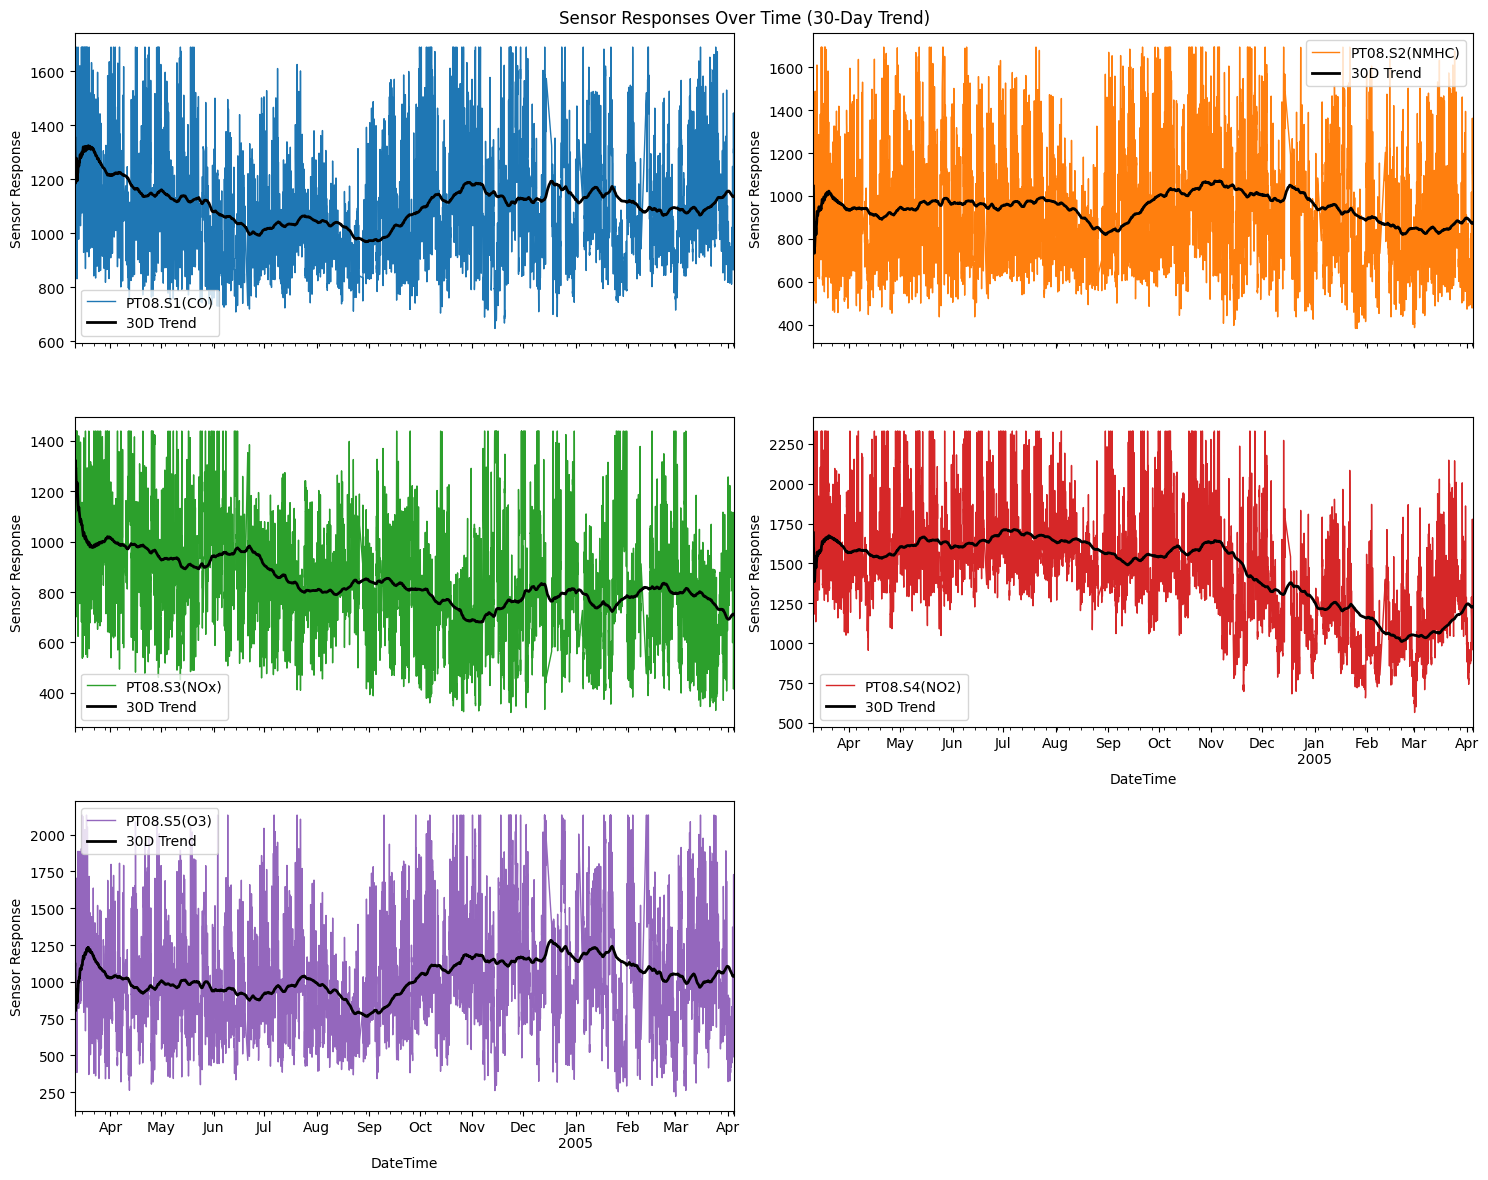

Saved 'sensors_vs_time_with_trend.png'


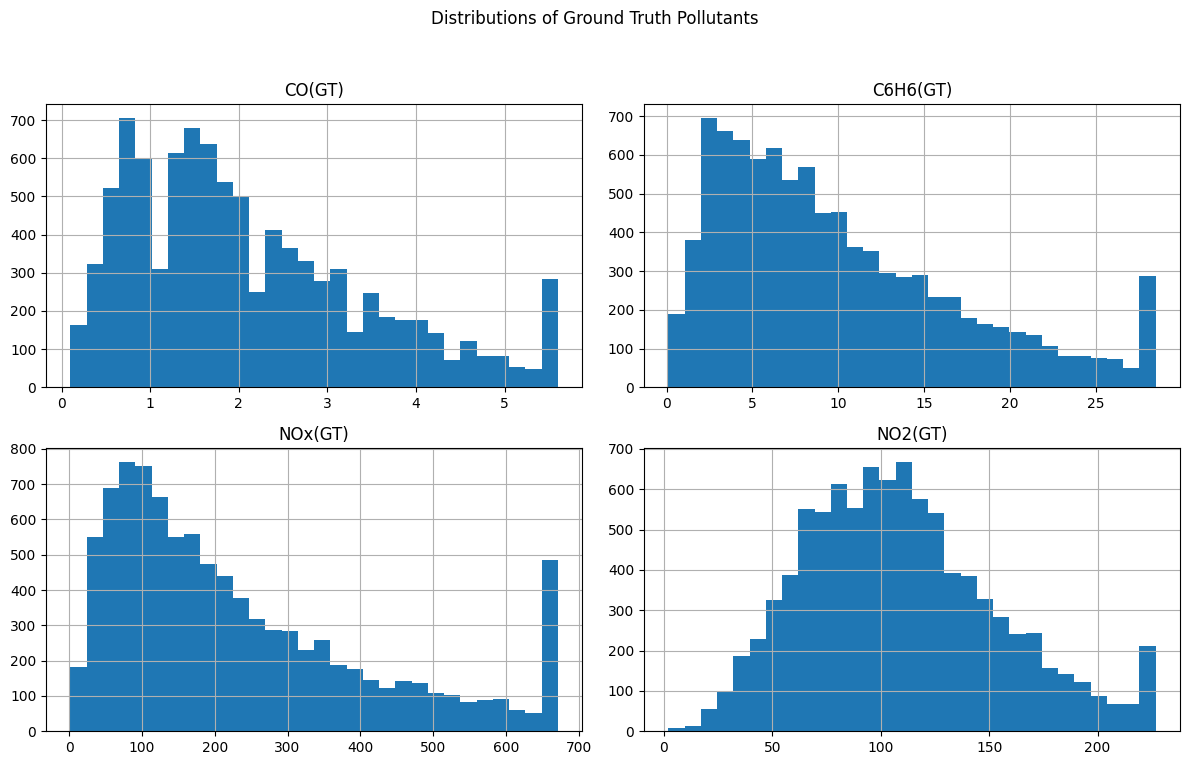

In [98]:
pollutants = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
sensors = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

axes = df_capped[pollutants].plot(
    lw=1, subplots=True, layout=(2, 2), figsize=(15, 10),
    title="Ground Truth Pollutants Over Time (30-Day Trend)", legend=False
    )

axes_flat = axes.flatten()  # Flatten the 2x2 array of axes into a 1D list for easy looping
window_size = '30D' # 30-day rolling average

for ax, pollutant in zip(axes_flat, pollutants):
    rolling_mean = df_capped[pollutant].rolling(window=window_size).mean()

    rolling_mean.plot(
        ax=ax, color='black', lw=2, label=f'{window_size} Trend'
    )
    ax.lines[0].set_label(f'{pollutant}')
    ax.legend()
    ax.set_ylabel("Concentration")

plt.tight_layout()
plt.savefig('pollutants_vs_time_with_trend.png')
plt.show()
plt.close()
print("Saved 'pollutants_vs_time_with_trend.png'")

axes = df_capped[sensors].plot(
    lw=1, subplots=True, layout=(3, 2), figsize=(15, 12),
    title="Sensor Responses Over Time (30-Day Trend)", legend=False
)
axes_flat = axes.flatten()
window_size = '30D'
for ax, sensor in zip(axes_flat, sensors):
    rolling_mean = df_capped[sensor].rolling(window=window_size).mean()

    rolling_mean.plot(
        ax=ax, color='black', lw=2, label=f'{window_size} Trend'
    )
    ax.lines[0].set_label(f'{sensor}')
    ax.legend()
    ax.set_ylabel("Sensor Response")

axes[2, 1].axis('off') # Turning off the 6th (empty) subplot

plt.tight_layout()
plt.savefig('sensors_vs_time_with_trend.png')
plt.show()
plt.close()
print("Saved 'sensors_vs_time_with_trend.png'")

# ollutant Distributions
df_capped[pollutants].hist(bins=30, figsize=(12, 8), layout=(2, 2))
plt.suptitle('Distributions of Ground Truth Pollutants')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('pollutant_distributions.png')
plt.show()
plt.close()



#### Findings

#### **Ground Truth Pollutants Over Time**

This plot reveals two key behaviors:

- **Seasonal Trend:**  
  The 30-day (black) trend line clearly shows that all four pollutants follow a strong seasonal cycle.  
  Concentrations are **high in the winter months (Oct–Mar)** and **low in the summer months (Jun–Aug)**.

- **High Volatility:**  
  The hourly data is extremely *“noisy”*, showing rapid, large changes from one hour to the next.  
  The trend line effectively cuts through this noise to reveal the slower, underlying seasonal pattern.

---

#### **Sensor Responses Over Time**

This plot’s findings closely mirror the *Ground Truth* plot and confirm that the sensors are working as expected.

- **Seasonal Tracking:**  
  The sensors also follow the same seasonal cycle, with responses peaking in the winter and hitting a low in the summer.

- **Cross-Sensitivity:**  
  All five sensors follow this same pattern.  
  All sensors react to the same underlying seasonal changes in the environment and pollution mix.

---

#### **Distributions of Ground Truth Pollutants**

This plot shows the statistical distribution of the pollutant data.

- **Positively Skewed:**  
  None of the pollutants are “normally distributed” (a symmetrical bell curve).  
  All four are **positively skewed (right-skewed).**

- **Insight:**  
  This skew means that for most of the year, pollution values are clustered at the low end.  
  However, there is a *long tail to the right* — representing the less frequent but high-pollution days (e.g., during winter) — which pulls the average upward.


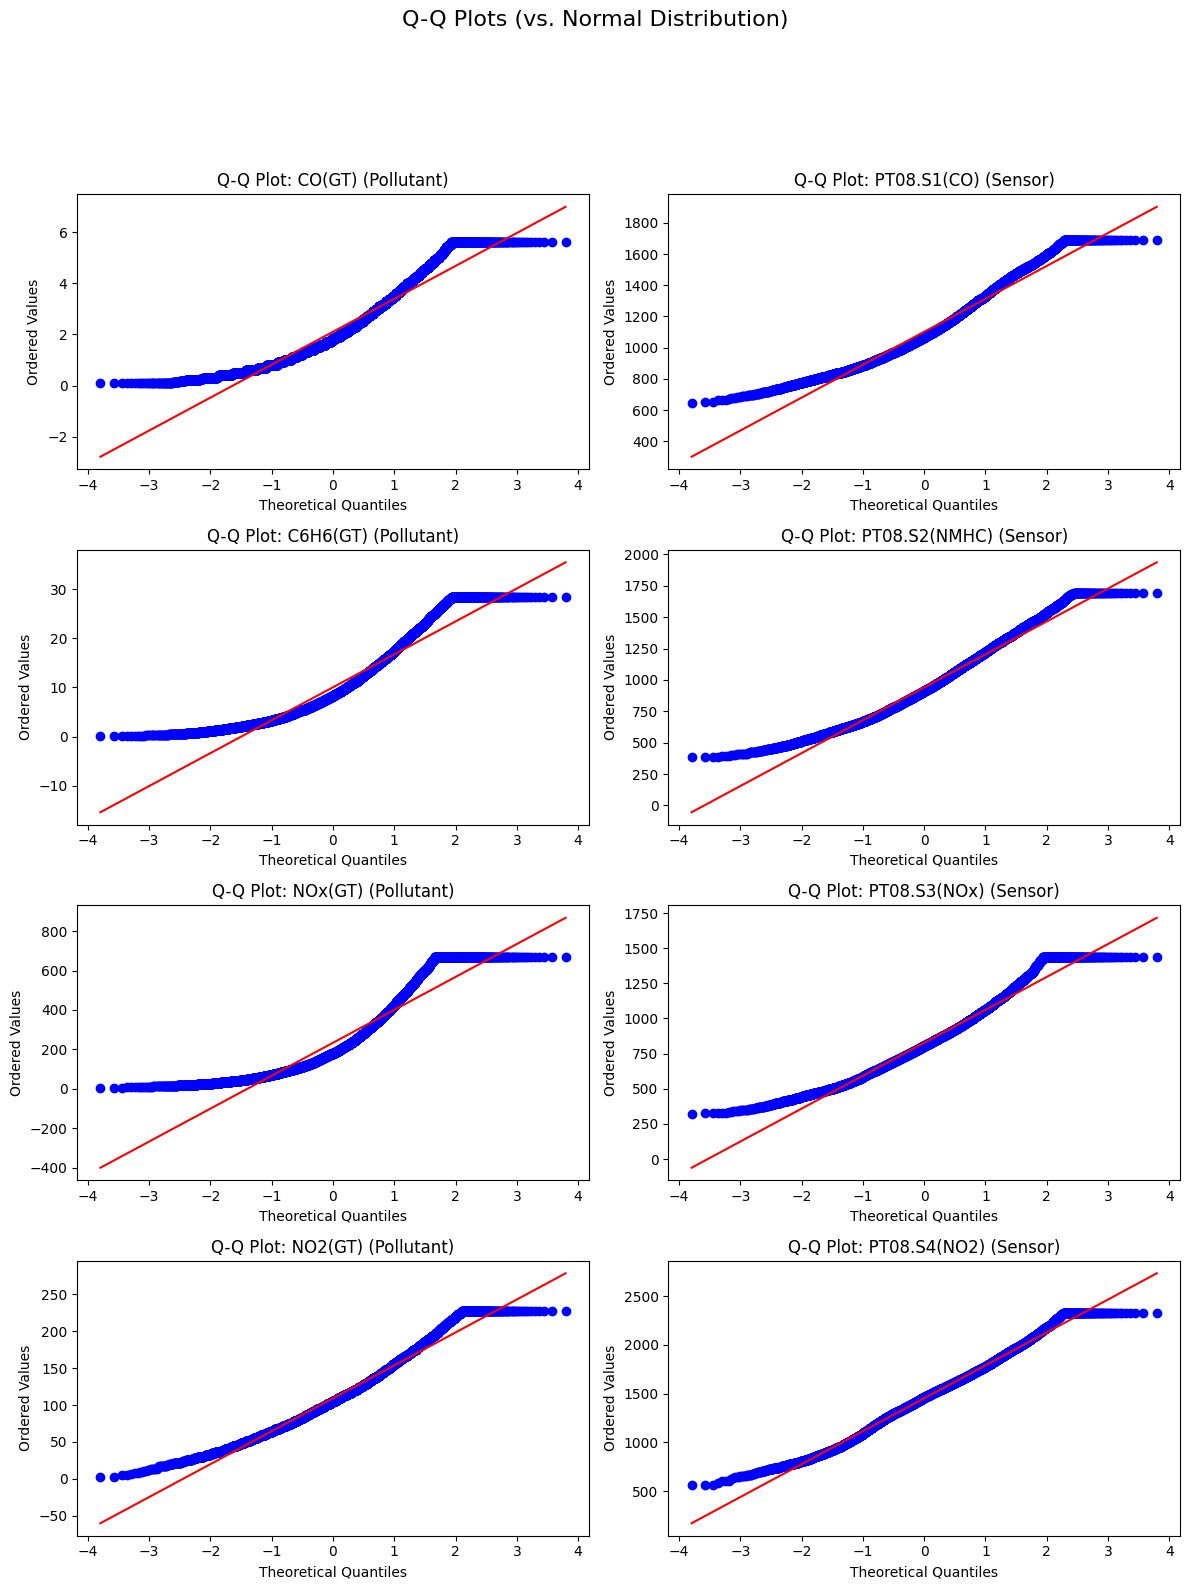

Saved 'qq_plots_normality.png'


In [99]:
pairs = [
    ('CO(GT)', 'PT08.S1(CO)'),
    ('C6H6(GT)', 'PT08.S2(NMHC)'),
    ('NOx(GT)', 'PT08.S3(NOx)'),
    ('NO2(GT)', 'PT08.S4(NO2)')
]

fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # Create a 4-row, 2-column subplot grid

for i, (pollutant, sensor) in enumerate(pairs):
    # --- Plot Pollutant (Left Column) ---
    stats.probplot(df_capped[pollutant], dist="norm", plot=axes[i, 0])
    axes[i, 0].set_title(f'Q-Q Plot: {pollutant} (Pollutant)')
    axes[i, 0].set_xlabel('Theoretical Quantiles')
    axes[i, 0].set_ylabel('Ordered Values')

    # --- Plot Sensor (Right Column) ---
    stats.probplot(df_capped[sensor], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot: {sensor} (Sensor)')
    axes[i, 1].set_xlabel('Theoretical Quantiles')
    axes[i, 1].set_ylabel('Ordered Values')

plt.suptitle('Q-Q Plots (vs. Normal Distribution)', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('qq_plots_normality.png')
plt.show()
plt.close()

print("Saved 'qq_plots_normality.png'")

#### **Findings: Q-Q Plots (vs. Normal Distribution)**

- **Data is Not Normal:**

**None of the features are normally distributed**.  

- **Positive Skew Confirmed:**  
  The data points consistently form an *“S”* shape that curves away from the red line, especially at the high and low ends.  
  This visually confirms the **positive skew (right-skew)**  (upward curve) observed earlier in the histograms.

- **Implication:**  
  This shape indicates that for all features, the data is heavily clustered at the low end, with a *long right tail* representing less frequent, high-value outliers.


- **Note:**
  The `C6H6(GT)` (Benzene) column was paired with the `PT08.S2(NMHC)` sensor because Benzene is a Non-Methane Hydrocarbon (`NMHC`), and the sensor is "nominally NMHC targeted"; this pairing was necessary because the dataset's "Ground Truth" `NMHC(GT)` column was 90% missing and had to be dropped, leaving `C6H6(GT)` as the only usable Ground Truth hydrocarbon measurement.


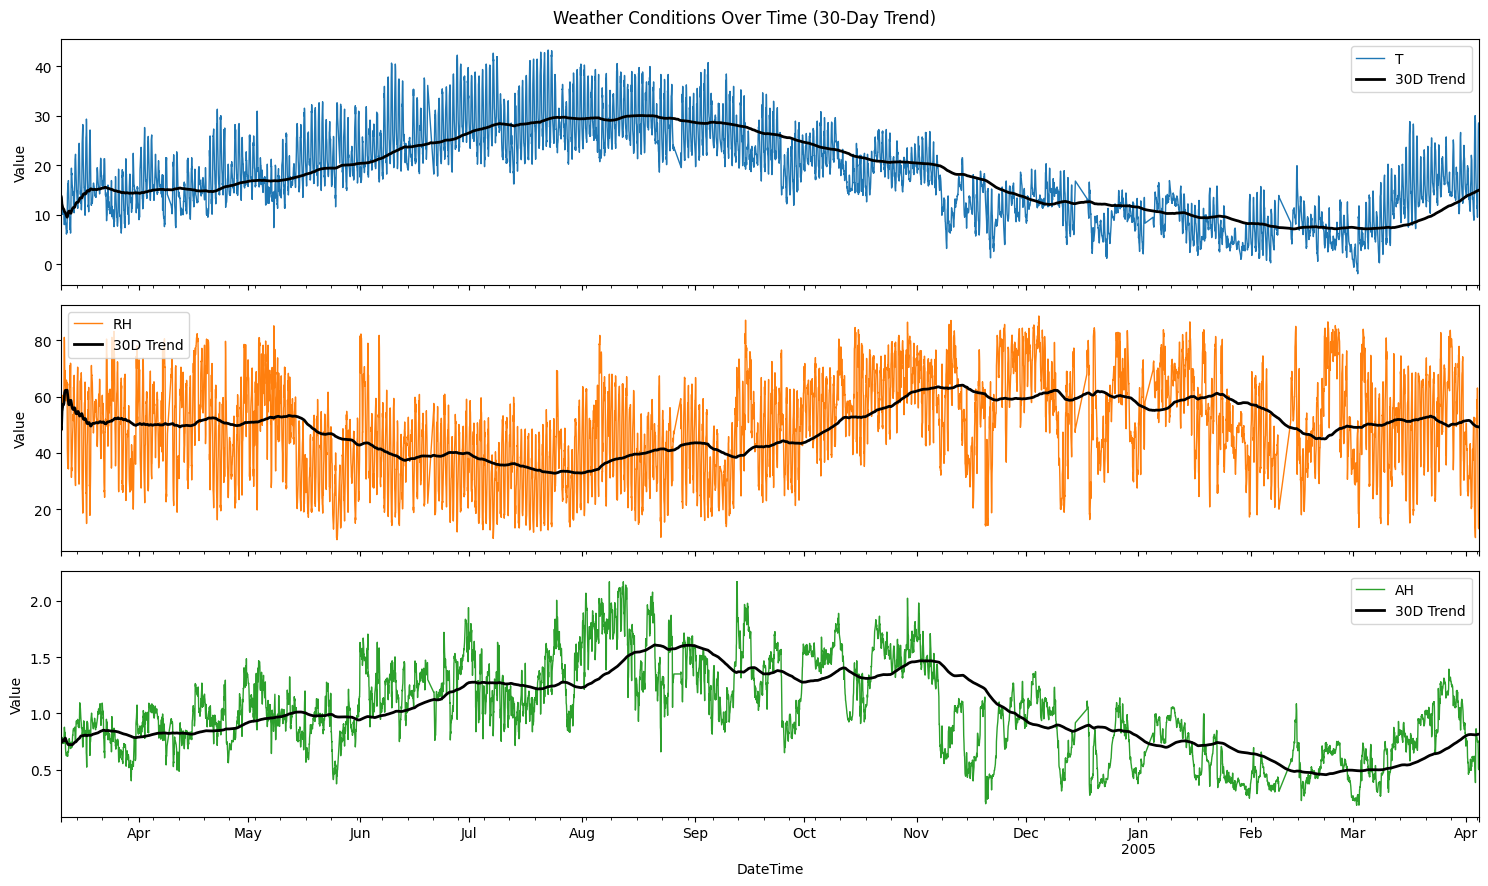

Saved 'weather_vs_time_with_trend.png'


In [100]:
weather = ['T', 'RH', 'AH']

axes = df_capped[weather].plot(
    lw=1, subplots=True, layout=(3, 1), figsize=(15, 9),
    title="Weather Conditions Over Time (30-Day Trend)", legend=False
)

axes_flat = axes.flatten()

window_size = '30D'

for ax, weather_var in zip(axes_flat, weather):
    rolling_mean = df_capped[weather_var].rolling(window=window_size).mean()
    rolling_mean.plot(
        ax=ax, color='black', lw=2, label=f'{window_size} Trend'
    )
    ax.lines[0].set_label(f'{weather_var}')
    ax.legend()
    ax.set_ylabel("Value")

plt.tight_layout()
plt.savefig('weather_vs_time_with_trend.png')
plt.show()
plt.close()

print("Saved 'weather_vs_time_with_trend.png'")


#### **Findings: Weather Conditions Over Time**

These plots provide a clear view of the seasonal weather cycle across the one-year period:

- **Strong Seasonal Cycle:**  
  The 30-day (black) trend line in all three plots shows a strong, smooth seasonal curve, confirming that **weather is a major and predictable factor** in this dataset.

- **Temperature & Absolute Humidity (T & AH):**  
  These two variables are **directly related** — both follow the same pattern:  
  rising to a peak during the **hot summer months (July–August)** and falling to their lowest levels in the **cold winter months (December–January)**.  
  This makes physical sense, as warmer air can hold more moisture.

- **Relative Humidity (RH):**  
  This variable shows a clear **inverse (negative) relationship** with temperature.  
  It **peaks in the cold winter** (when the air’s capacity to hold water is low) and **drops in the hot summer** (when the air’s capacity is high).


<Figure size 1200x600 with 0 Axes>

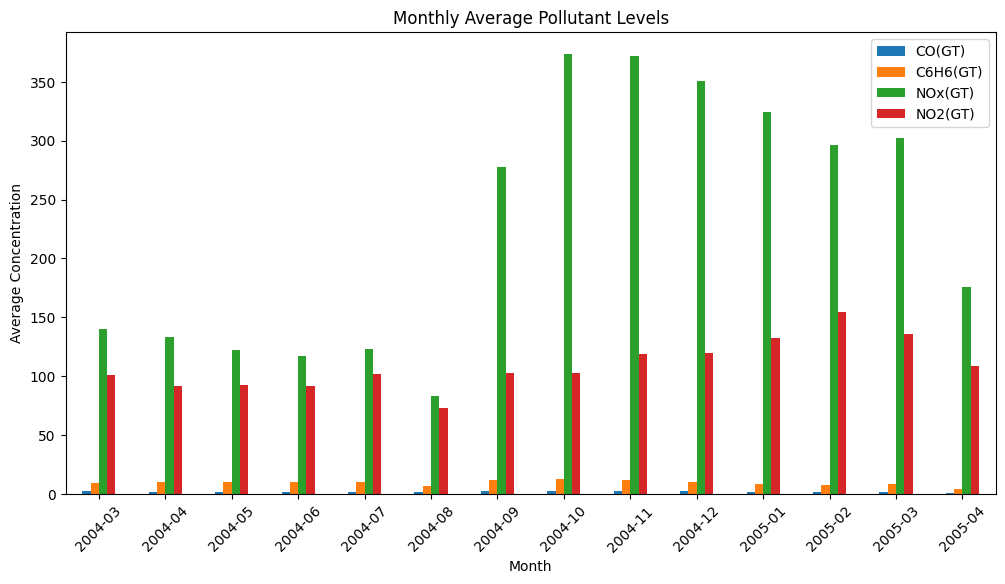

<Figure size 1200x600 with 0 Axes>

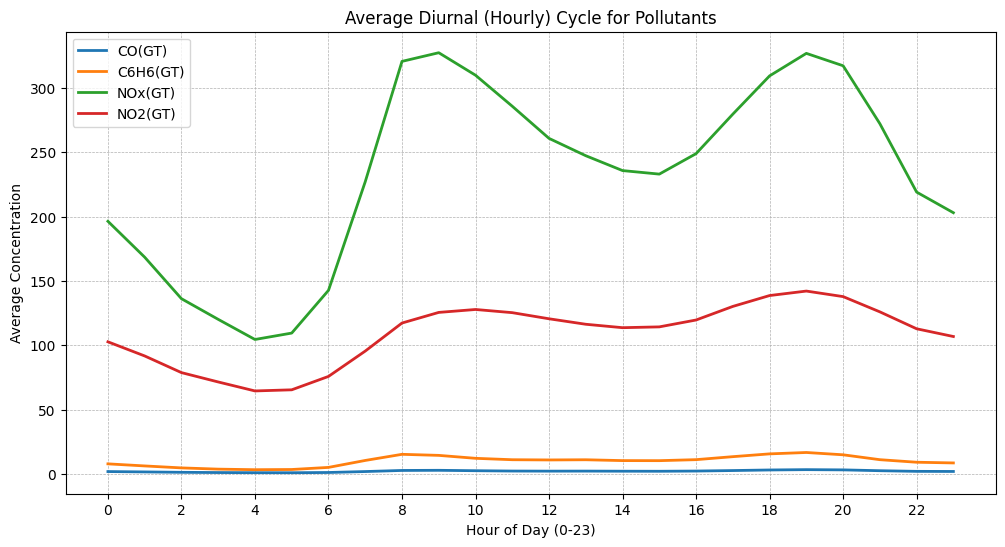

In [101]:
df_monthly = df_capped.resample('M').mean()
pollutants = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
plt.figure(figsize=(12, 6))
df_monthly[pollutants].plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Average Pollutant Levels')
plt.ylabel('Average Concentration')
plt.xlabel('Month')
plt.xticks(ticks=range(len(df_monthly.index)), labels=[idx.strftime('%Y-%m') for idx in df_monthly.index], rotation=45)
plt.savefig('monthly_average_pollutants.png')
plt.show()


df_hourly = df_capped.groupby(df_capped.index.hour).mean()
plt.figure(figsize=(12, 6))
df_hourly[pollutants].plot(lw=2, figsize=(12, 6))
plt.title('Average Diurnal (Hourly) Cycle for Pollutants')
plt.ylabel('Average Concentration')
plt.xlabel('Hour of Day (0-23)')
plt.xticks(range(0, 24, 2))
plt.grid(True, which='both', linestyle='--', lw=0.5)
plt.savefig('diurnal_cycle_pollutants.png')
plt.show()
plt.close()

#### **Findings: Monthly Average Pollutant Levels**

This bar chart strongly confirms the **seasonal trend** observed in previous plots.

- **Winter vs. Summer:**  
  All four pollutants show **significantly higher average concentrations** during the colder months (October–March).

- **Summer Low:**  
  The **lowest concentrations** for all pollutants occur during the summer (June–August).

---

### **Findings: Average Diurnal (Hourly) Cycle**

This line plot provides clear insight into the **daily pollution patterns**, which are directly linked to **human activity (traffic)**.

- **Two Peaks:**  
  All pollutants show two distinct peaks — the first in the **morning (8:00–9:00 AM)** and the second, more pronounced one in the **evening (6:00–8:00 PM / 18:00–20:00)**.

- **Rush Hour Effect:**  
  These two peaks correspond precisely to **morning and evening rush hours**, identifying **vehicle exhaust** as a primary contributor.

- **Afternoon Dip:**  
  Pollution levels **drop during midday (around 2:00 PM / 14:00)** and are **lowest in the early morning hours (12:00–5:00 AM)**.


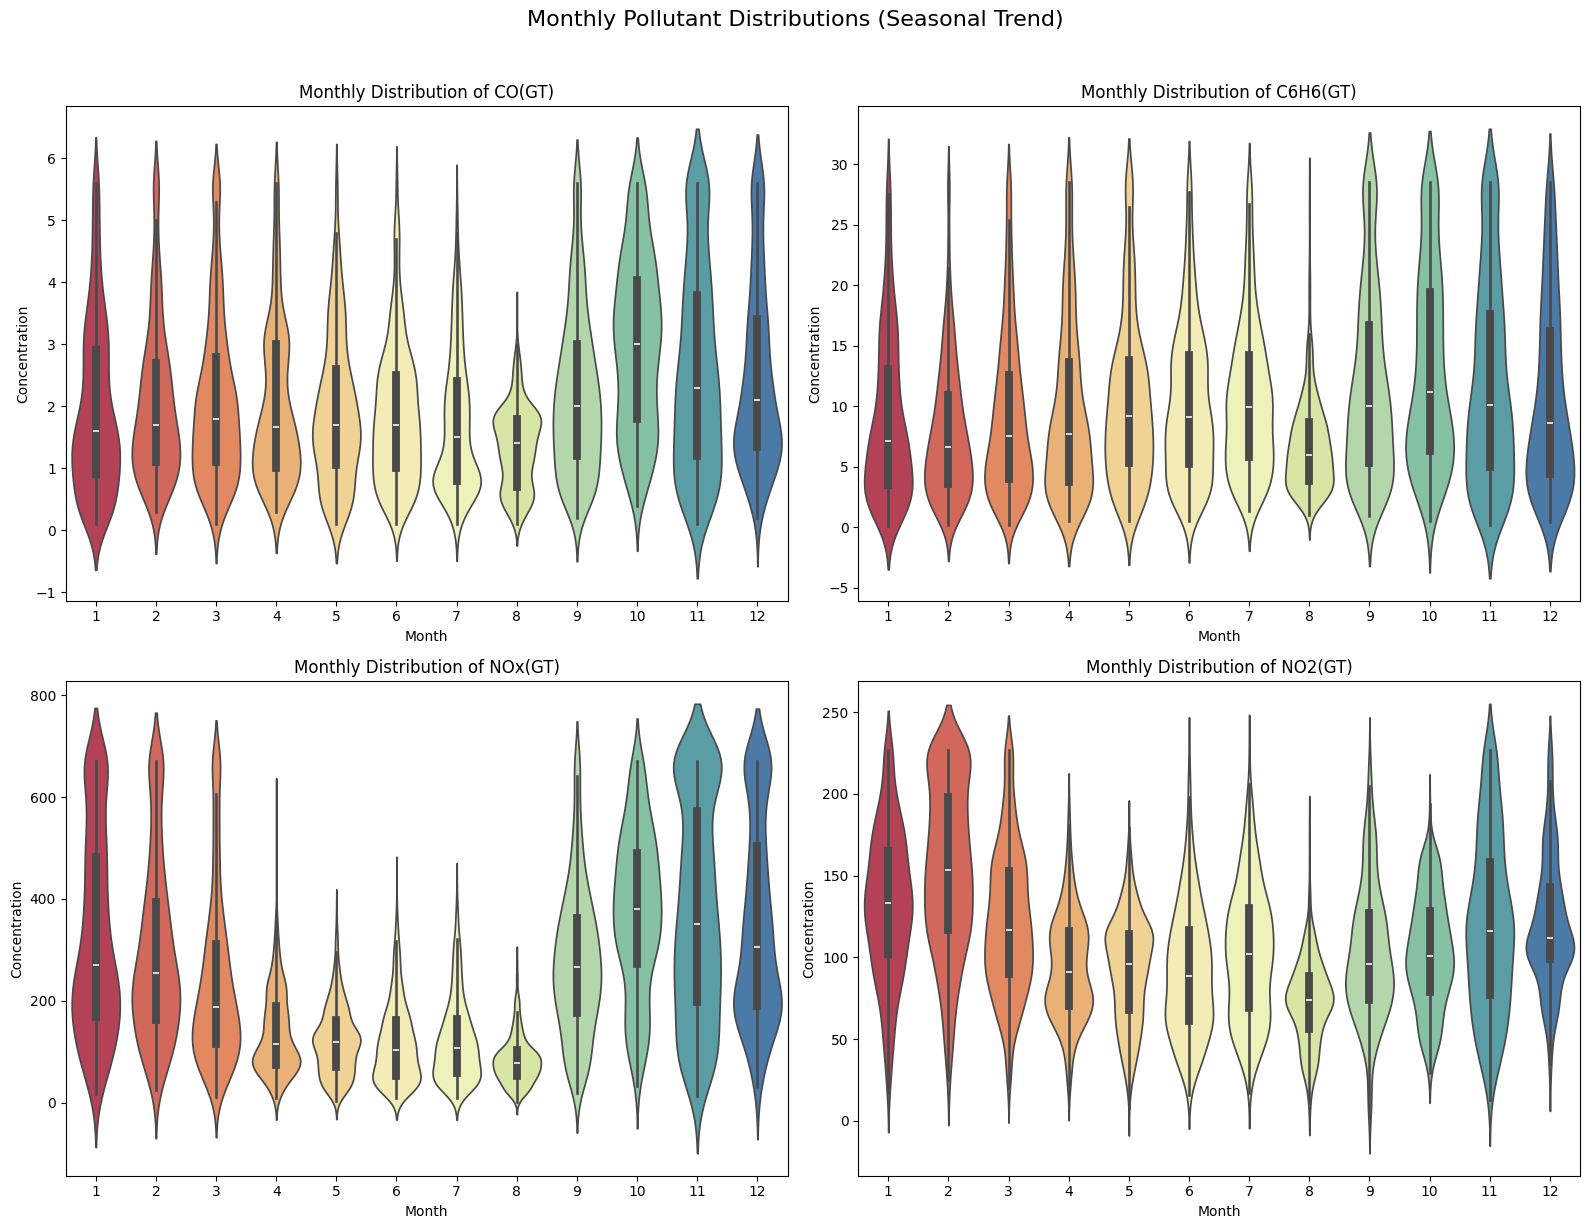

Saved 'violin_all_by_month.png'


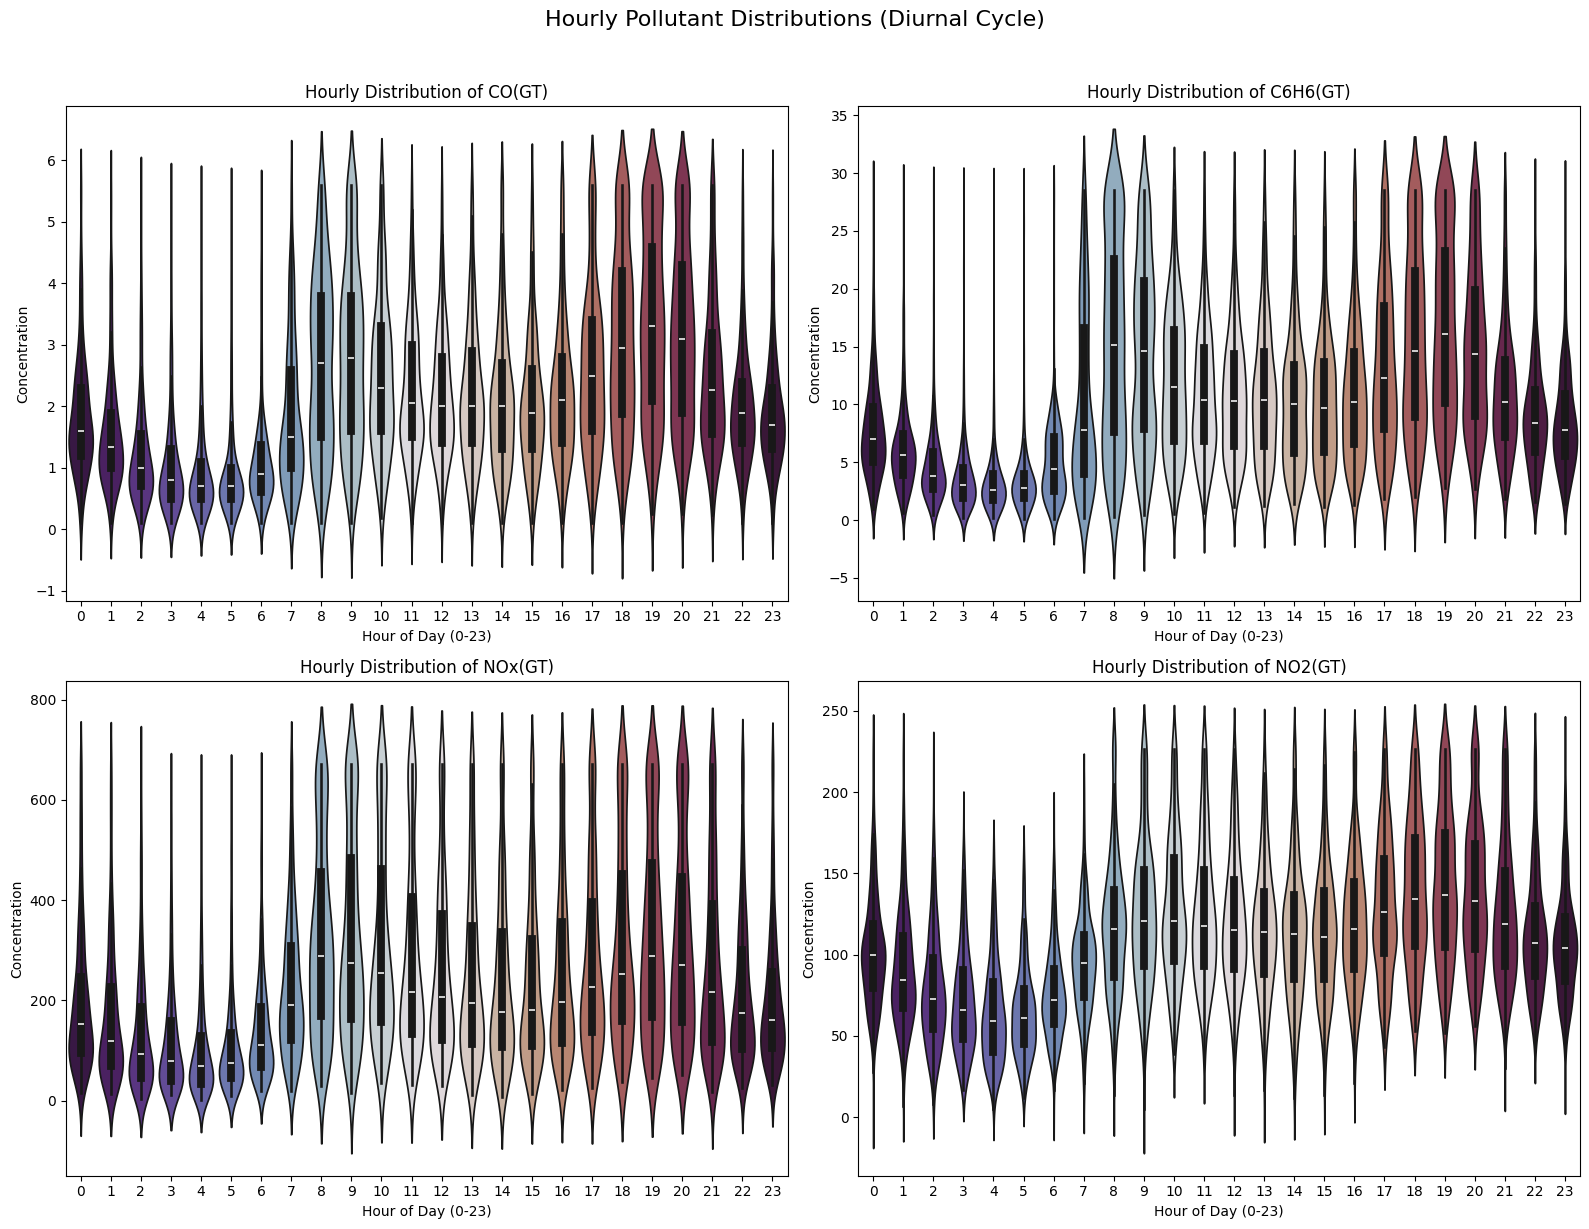

Saved 'violin_all_by_hour.png'


In [102]:
# Creating temporary 'Month' and 'Hour' columns for plotting
df_plot_temp = df_capped.copy()
df_plot_temp['Month'] = df_plot_temp.index.month
df_plot_temp['Hour'] = df_plot_temp.index.hour


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes_flat = axes.flatten()

for ax, pollutant in zip(axes_flat, pollutants):
    sns.violinplot(x='Month', y=pollutant, data=df_plot_temp, ax=ax, palette='Spectral')
    ax.set_title(f'Monthly Distribution of {pollutant}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Concentration')

plt.suptitle('Monthly Pollutant Distributions (Seasonal Trend)', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('violin_all_by_month.png')
plt.show()
plt.close()
print("Saved 'violin_all_by_month.png'")


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes_flat = axes.flatten()

for ax, pollutant in zip(axes_flat, pollutants):
    sns.violinplot(x='Hour', y=pollutant, data=df_plot_temp, ax=ax, palette='twilight_shifted')
    ax.set_title(f'Hourly Distribution of {pollutant}')
    ax.set_xlabel('Hour of Day (0-23)')

    ax.set_ylabel('Concentration')

plt.suptitle('Hourly Pollutant Distributions (Diurnal Cycle)', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('violin_all_by_hour.png')
plt.show()
plt.close()
print("Saved 'violin_all_by_hour.png'")

#### **Findings: Monthly Pollutant Distributions**

This set of plots reveals a strong, unified **seasonal trend** across all four pollutants.

- **Winter vs. Summer:**  
  During the **winter months (Oct–Mar)**, the “violins” are tall and wide.  
  This indicates that pollutant concentrations are not only **higher on average** but also **more variable**, showing a wider spread of high-pollution days.

- **Summer Low:**  
  In contrast, the **summer months (Jun–Aug)** show short and compressed violins, meaning pollution levels are **consistently low**.  
  This strongly suggests that **weather is a dominant influencing factor**.

---

#### **Findings: Hourly Pollutant Distributions**


These plots clearly illustrate a **daily (diurnal) pollution cycle** driven by **human activity**, particularly **traffic patterns**.

- **Rush Hour Peaks:**  
  All four pollutants show two distinct peaks — one in the **morning (8:00–9:00)** and a stronger one in the **evening (18:00–20:00)** — where the violins are tallest and widest.

- **Daily Lows:**  
  Pollution levels are **lowest and most stable** during the **midday (around 14:00)** and **late-night hours (00:00–05:00)**.  
  This pattern strongly identifies **vehicle emissions during commuting hours** as a primary pollution source.


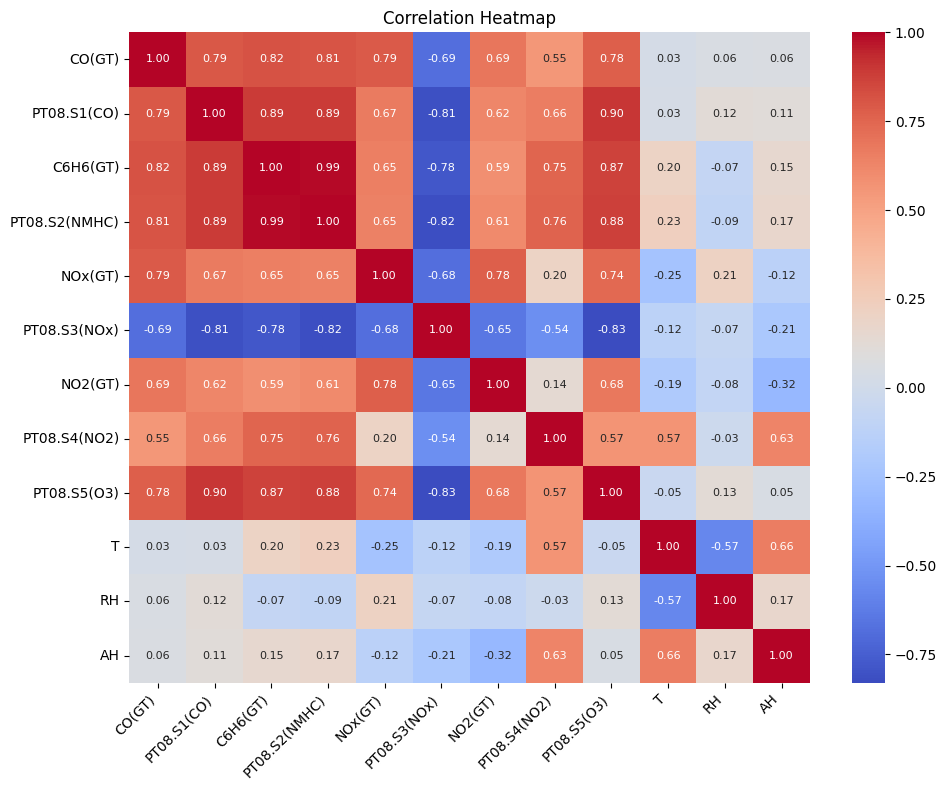

Saved 'correlation_heatmap.png'

--- List of Columns with High Correlation (>= 0.80) to at least one other column ---
['C6H6(GT)', 'CO(GT)', 'PT08.S3(NOx)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S5(O3)']


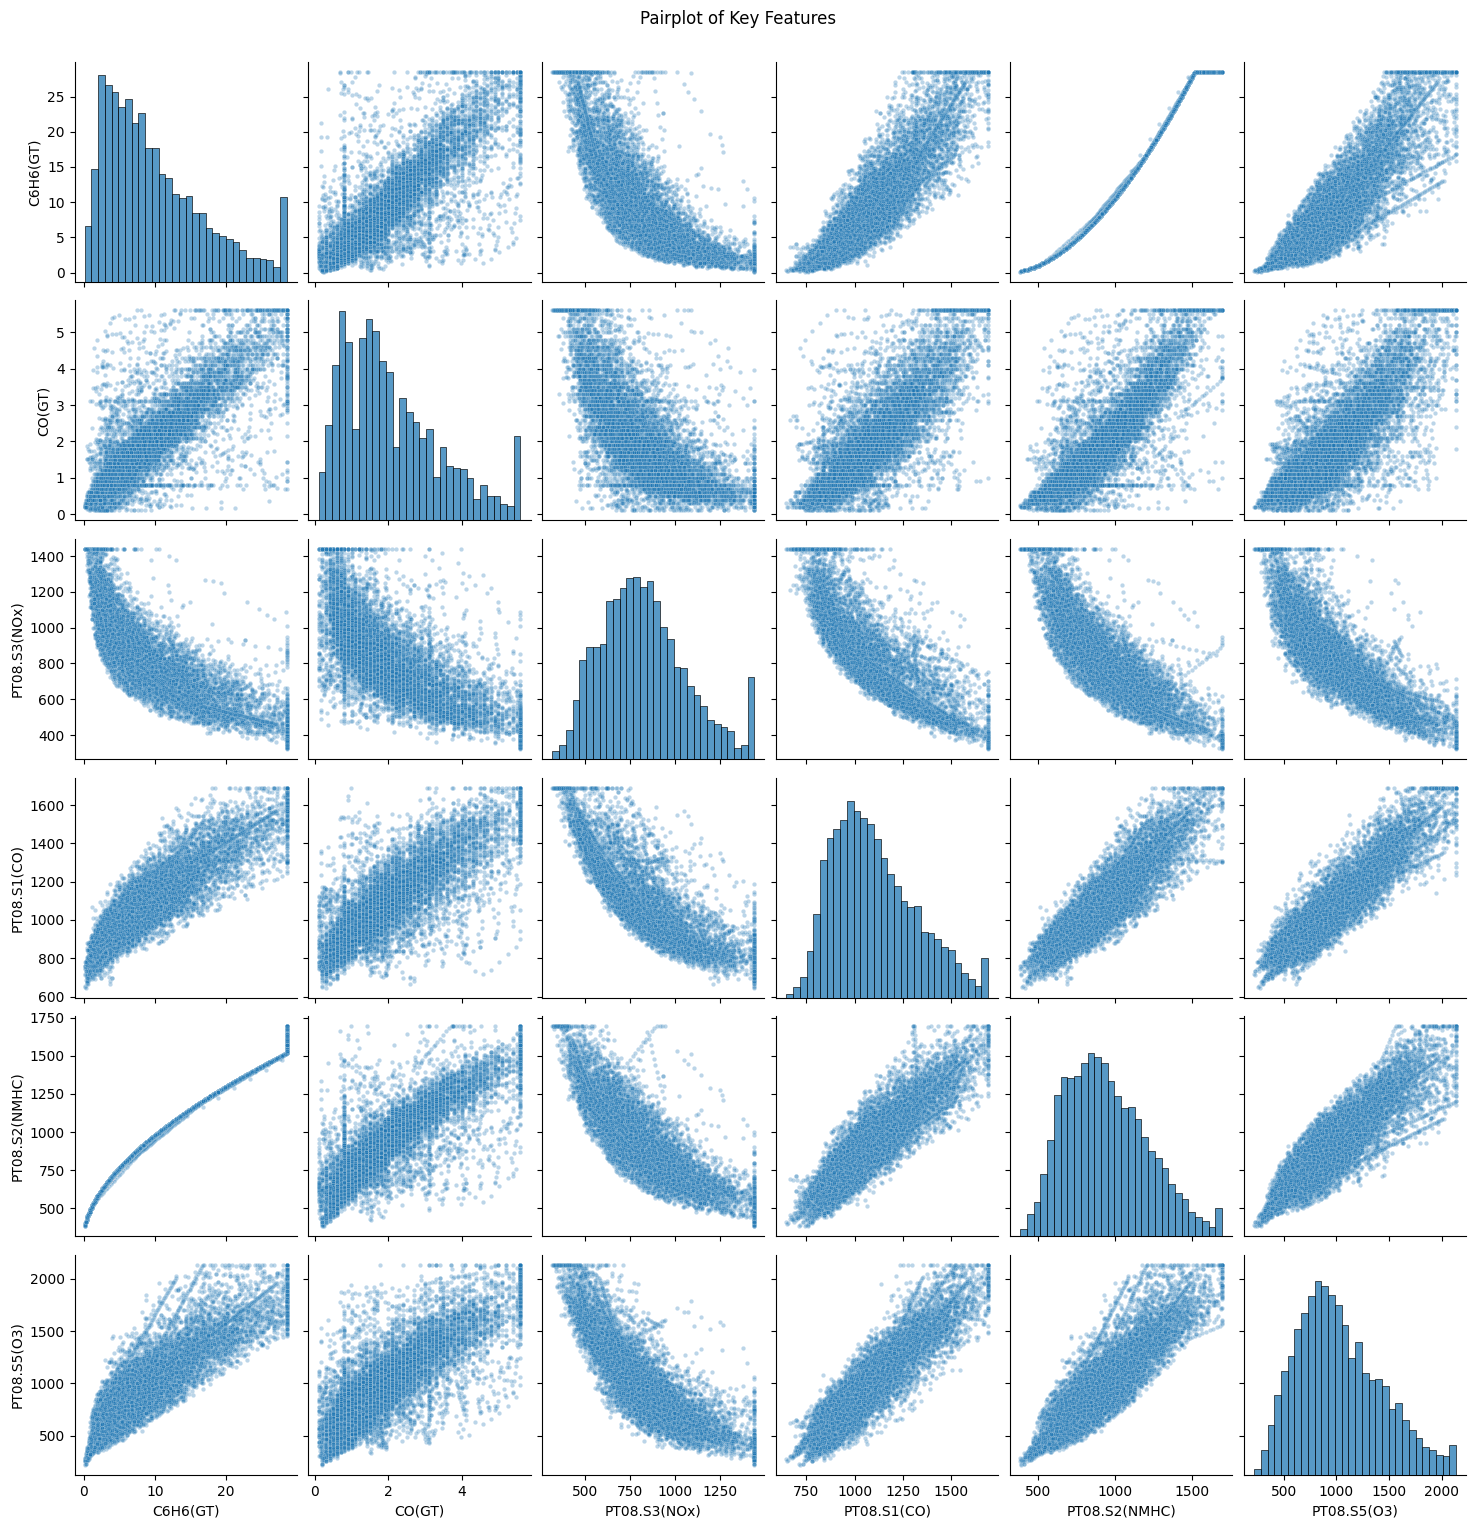

In [103]:
plt.figure(figsize=(10, 8))
corr_matrix = df_capped.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()
plt.close()
print("Saved 'correlation_heatmap.png'")

CORR_THRESHOLD = 0.80
highly_corr_columns = set()
columns = corr_matrix.columns

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):

        col1 = columns[i]
        col2 = columns[j]
        corr_value = corr_matrix.loc[col1, col2]
        if abs(corr_value) >= CORR_THRESHOLD:
            highly_corr_columns.add(col1)
            highly_corr_columns.add(col2)

final_list = list(highly_corr_columns)

print("\n--- List of Columns with High Correlation (>= 0.80) to at least one other column ---")
print(final_list)


# Pairplot
sns.pairplot(df_capped[final_list], plot_kws={'alpha': 0.3, 's': 10}, diag_kws={'bins': 30})
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.savefig('pairplot_subset.png')
plt.show()
plt.close()

#### **Findings: Correlation Heatmap**

This heatmap quantifies the **linear relationships** between all variables in the dataset.

- **Strong Positive Correlations:**  
  There are very strong positive correlations (**dark red boxes, >0.80**) between many of the pollutants and the sensors.  
  This confirms that the **sensors are highly responsive** to the pollutant concentrations.

- **Cross-Sensitivity:**  
  Many features are highly correlated with each other (e.g., `CO(GT)` and `C6H6(GT)` at **0.82**).  
  This visually confirms the dataset’s **cross-sensitivity**, where pollutants originate from similar sources and sensors respond to multiple pollutants simultaneously.

- **Weather Impact:**  
  Weather-related variables (`T`, `RH`, `AH`) show **notable correlations** with both the pollutants and the sensors, confirming that they are **important predictive features** to include in any modeling process.

---

#### **Findings: Pairplot of Key Features**

This plot shows **scatter plots** for every pair of highly correlated features, providing a deeper look into the relationships observed in the heatmap.

- **Linear Relationships:**  
  The scatter plots (off-diagonal) confirm that the high correlations are indeed **linear**.  
  For example, in plots like `CO(GT)` vs. `C6H6(GT)`, the points form a **tight, upward-sloping line**, indicating a strong linear dependence.

- **Distribution Shape:**  
  The histograms (on the diagonal) display each feature’s individual distribution.  
  These confirm earlier findings — all variables are **positively skewed (right-skewed)**, with most values clustered at the low end and a **long tail of higher values**.


### `Step 7: Feature Engineering`

In [104]:
df_featured = df_capped.copy()
all_columns = df_featured.columns

# 1. Lag Features (e.g., Value 1 hour ago)
for col in all_columns:
    df_featured[f'{col}_lag_1hr'] = df_featured[col].shift(1)
print("Step 1/3: Lag features created.")

# 2. Rolling Average Features (e.g., 24-hour moving average)
for col in all_columns:
    df_featured[f'{col}_roll_24hr'] = df_featured[col].rolling(window=24).mean()
print("Step 2/3: Rolling features created.")

# 3. Time-Based Features
df_featured['hour'] = df_featured.index.hour
df_featured['day_of_week'] = df_featured.index.dayofweek
df_featured['month'] = df_featured.index.month
print("Step 3/3: Time features created.")

print(f"DataFrame shape before cleaning: {df_featured.shape}")
df_featured.dropna(inplace=True)                               # Drop all rows that still contain any NaNs (from shift/rolling)
print(f"DataFrame shape after dropping NaNs: {df_featured.shape}")
print(df_featured.head())

Step 1/3: Lag features created.
Step 2/3: Rolling features created.
Step 3/3: Time features created.
DataFrame shape before cleaning: (9357, 39)
DataFrame shape after dropping NaNs: (9334, 39)
                     CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
DateTime                                                                     
2004-03-11 17:00:00     2.9       1383.0      11.2         1020.0    243.0   
2004-03-11 18:00:00     4.8       1581.0      20.8         1319.0    281.0   
2004-03-11 19:00:00     5.6       1690.5      27.4         1488.0    383.0   
2004-03-11 20:00:00     5.6       1640.0      24.0         1404.0    351.0   
2004-03-11 21:00:00     3.9       1313.0      12.8         1076.0    240.0   

                     PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T  \
DateTime                                                                      
2004-03-11 17:00:00        1008.0    135.0        1719.0       1104.0   9.8   
2004-03-11 18:00:00    



We create new columns (**features**) from our existing data..

---

- **Lag Features (`shift(1)`):**  
  New columns (e.g., `CO_lag_1hr`) are created that contain the value of that feature **from 1 hour ago**.  
  This is the most important feature, as it gives the model **short-term memory** of recent observations.

- **Rolling Features (`rolling(24).mean()`):**  
  New columns (e.g., `CO_roll_24hr`) represent the **average value over the previous 24 hours**.  
  These help the model capture **recent trends** and smooth out **short-term noise** in the data.

- **Time-Based Features (`.hour`, `.dayofweek`, `.month`):**  
  We extract **hour**, **day**, and **month** from the timestamp to explicitly inform the model about:  
  - **Daily cycles** (e.g., rush hours)  
  - **Weekly patterns** (e.g., weekdays vs weekends)  
  - **Seasonal variations** (e.g., winter vs summer)

---

- **Final Cleaning (`dropna()`):**  
  The `shift()` and `rolling()` functions create **NaN values** at the beginning of the dataset (e.g., the first 23 rows have no “1 hour ago” value).  
  These rows must be **dropped**, since machine learning models **cannot handle missing values**.


### `Normalizing the data`

In [105]:
GT_COLS = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
y_targets = df_featured[GT_COLS]
X_features = df_featured.drop(columns=GT_COLS)

scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X_features)

X_scaled = pd.DataFrame(X_scaled_data, 
                        index=X_features.index, 
                        columns=X_features.columns)

print("Features scaled. X_scaled and y_targets are ready.")
print(X_scaled.head())

Features scaled. X_scaled and y_targets are ready.
                     PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
DateTime                                                                      
2004-03-11 17:00:00     1.308981       0.294621      0.768409      0.789027   
2004-03-11 18:00:00     2.230246       1.420555     -0.115057      1.863472   
2004-03-11 19:00:00     2.739733       2.056952     -0.525087      2.591084   
2004-03-11 20:00:00     2.504764       1.740636     -0.351775      2.182264   
2004-03-11 21:00:00     0.983282       0.505498      0.552826      0.753606   

                     PT08.S5(O3)         T        RH        AH  \
DateTime                                                         
2004-03-11 17:00:00     0.179445 -0.962329  1.072050 -0.501197   
2004-03-11 18:00:00     0.939220 -0.905400  0.874367 -0.531013   
2004-03-11 19:00:00     1.674084 -0.973715  1.170892 -0.467901   
2004-03-11 20:00:00     1.549531 -0.985101  1.083679 -0.514117   

#### Preparing Data for Modeling

- **Separate `X` and `y`:**  
  We create two new DataFrames to clearly distinguish between inputs and outputs.  

  - **`y_targets`:**  
    Contains our **Ground Truth pollutant columns** — the actual values we aim to predict (e.g., CO(GT), NOx(GT)).  
    These are **not scaled**, since we want to predict their **real-world values** (e.g., 2.6 mg/m³).

  - **`X_features`:**  
    Contains all **input features** used by the model — including sensor readings, weather variables, lag features, rolling averages, and time-based features.

---

- **Scale Features (`StandardScaler`):**  
  We apply **StandardScaler** to `X_features` only.  
  This transformation centers each feature around a **mean of 0** and a **standard deviation of 1**.  

  - This step is **critical for models** such as **SVM** and **KNN**, which are sensitive to feature scales.  
  - It also helps **all models** train more efficiently and converge faster.


### `Saving the data`


In [106]:
X_scaled.to_csv('model_features_X.csv')
print("Features saved to 'model_features_X.csv'")
y_targets.to_csv('model_targets_y.csv')
print("Targets saved to 'model_targets_y.csv'")  

Features saved to 'model_features_X.csv'
Targets saved to 'model_targets_y.csv'


#### With all **preprocessing** and **feature engineering** complete, we now save the final, model-ready datasets for training and evaluation.

- **`model_features_X.csv`:**  
  Contains all the **scaled input features**, including sensors, weather data, lag features, rolling averages, and time-based variables.

- **`model_targets_y.csv`:**  
  Contains the **original, unscaled Ground Truth target values** (pollutant concentrations) that the model will learn to predict.
